In [2]:
import os, pandas as pd, numpy as np

In [5]:
os.chdir("D:\\Assignments_SCMA632")

In [9]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [7]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [10]:
MANPR = df[df['state_1']=="MANPR"]

In [12]:
MANPR.isnull().sum().sort_values(ascending = False)

soyabean_v             2560
soyabean_q             2560
Meals_School           2543
Meals_Employer         2530
Otherwise_possessed    2469
                       ... 
chillig_q                 0
palak_q                   0
carrot_q                  0
radish_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [8]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [13]:
MANPR_new = MANPR[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [14]:
MANPR_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       7
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
dtype: int64

In [17]:
MANPR_clean = MANPR_new.copy()

In [19]:
MANPR_clean.loc[:, 'Meals_At_Home'] = MANPR_clean['Meals_At_Home'].fillna(MANPR_new['Meals_At_Home'].mean())

In [20]:
MANPR_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [17]:
# Outlier Checking

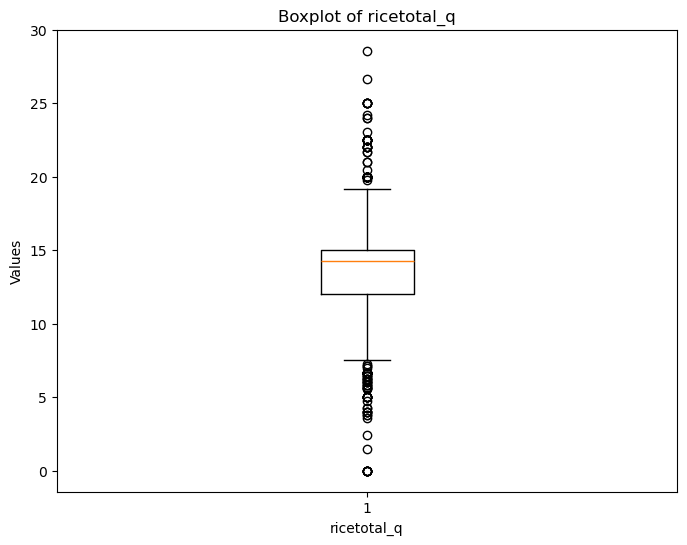

In [22]:
import matplotlib.pyplot as plt
# Assuming MANPR_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(MANPR_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [23]:
rice1 = MANPR_clean['ricetotal_q'].quantile(0.25)
rice2 = MANPR_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [27]:
MANPR_clean=MANPR_new[(MANPR_new['ricetotal_q']<=up_limit)&(MANPR_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x17d47e459d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17d47e443d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d47e46210>],
 'medians': [<matplotlib.lines.Line2D at 0x17d47e335d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d47e32dd0>],
 'means': []}

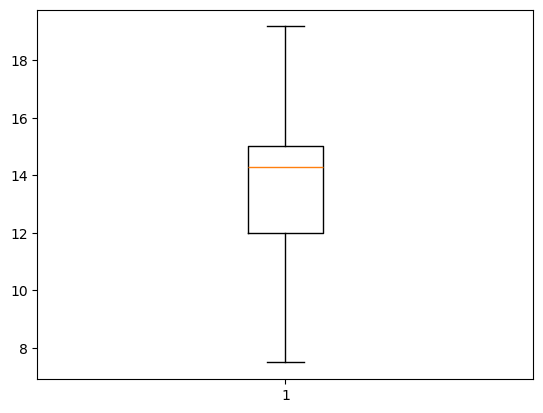

In [26]:
plt.boxplot(MANPR_clean['ricetotal_q'])

In [29]:
MANPR_clean['District'].unique()

array([9, 7, 6, 5, 4, 8, 3, 1, 2], dtype=int64)

In [32]:
# Replace values in the 'Sector' column
MANPR_clean.loc[:,'Sector'] = MANPR_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [33]:
MANPR_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [34]:
MANPR_clean.loc[:, 'total_consumption'] = MANPR_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\jyoth\AppData\Local\Temp\ipykernel_17580\172693127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MANPR_clean.loc[:, 'total_consumption'] = MANPR_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [35]:
MANPR_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
16453,MANPR,9,RURAL,2,142,12.500000,0.0,0.0,0,0.250000,0.0,16.687750,0.0,60.0,29.437750
16454,MANPR,9,RURAL,2,142,16.000000,0.0,0.2,0,0.000000,0.0,19.600145,0.0,60.0,35.800145
16455,MANPR,9,RURAL,2,142,13.333333,0.0,0.0,0,0.250000,0.0,16.250121,0.0,60.0,29.833454
16456,MANPR,9,RURAL,2,142,13.333333,0.0,0.0,0,0.166667,0.0,16.333450,0.0,60.0,29.833450
16457,MANPR,9,RURAL,2,142,13.333333,0.0,0.0,0,0.166667,0.0,16.333450,0.0,60.0,29.833450


In [36]:
MANPR_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              18.362061  48.423095  293.917133  16.975100
2              12.310085  44.353584  141.500867  20.100245

In [37]:
MANPR_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                12.401225  50.586253   88.562787  25.125238
2                 4.619878  37.223397   47.667325  23.280302
3                10.772232  45.592754  114.710133  29.557950
4                19.297863  48.830637  131.750550  24.350266
5                21.242359  52.038801  293.917133  24.250308
6                17.755494  47.057384  117.650209  16.975100
7                12.985409  46.113740  131.375213  25.321633
8                16.176547  46.953010  141.500867  29.700450
9                 9.222923  39.023669   82.000263  20.100245

In [40]:
total_consumption_by_districtcode=MANPR_clean.groupby('District')['total_consumption'].sum()

In [41]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
6    34634.234485
5    23157.266335
7    14295.259518
Name: total_consumption, dtype: float64

In [50]:
MANPR_clean.loc[:,"District"] = MANPR_clean.loc[:,"District"].replace({6: "Imphal West", 5: "Thoubal", 7: "Imphal East"})

In [51]:
total_consumption_by_districtname=MANPR_clean.groupby('District')['total_consumption'].sum()

In [52]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Rangareddi              34634.234485
Hyderabad and Rangar    23157.266335
Imphal East             14295.259518
Name: total_consumption, dtype: float64

In [55]:
from statsmodels.stats import weightstats as stests

In [54]:
rural=MANPR_clean[MANPR_clean['Sector']=="RURAL"]
urban=MANPR_clean[MANPR_clean['Sector']=="URBAN"]

In [57]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
6777,AP,Hyderabad and Rangar,RURAL,3,283,5.0,1.666667,0.166667,0,0.166667,0.083333,18.308732,23.337333,60.0,48.729398
6778,AP,Hyderabad and Rangar,RURAL,3,283,15.0,0.000000,0.000000,0,0.500000,0.000000,29.781670,10.000000,60.0,55.281670
6779,AP,Hyderabad and Rangar,RURAL,3,283,9.0,0.400000,0.000000,0,0.100000,0.000000,18.412530,0.000000,60.0,27.912530
6780,AP,Hyderabad and Rangar,RURAL,3,283,11.5,1.250000,0.062500,0,0.250000,0.125000,24.025527,0.006000,60.0,37.219027
6781,AP,Hyderabad and Rangar,RURAL,3,283,12.0,1.000000,0.000000,0,0.100000,0.100000,22.070518,10.000000,84.0,45.270518


In [55]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
46517,MANPR,9,URBAN,2,142,14.6,0.0,0.0,0,0.4,0.0,19.000400,10.0,60.0,44.000400
46518,MANPR,9,URBAN,2,142,14.0,0.0,0.0,0,0.5,0.0,18.500438,7.5,60.0,40.500438
46519,MANPR,9,URBAN,2,142,14.0,0.0,0.0,0,0.5,0.0,18.333883,10.0,60.0,42.833883
46520,MANPR,9,URBAN,2,142,12.0,0.0,0.0,0,0.5,0.0,16.125287,12.5,60.0,41.125287
46521,MANPR,9,URBAN,2,142,12.0,0.0,0.0,0,0.0,0.0,15.875412,12.5,60.0,40.375412


In [56]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [60]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

NameError: name 'stests' is not defined